# Chapter 3 - Shallow Neural Networks

## Solutions to Chapter End Problems

**Problem 3.1** What kind of mapping from input to output would be created if the activation function in equation 3.1 was linear so that $a[z] = ψ_0 + ψ_1 z$? What kind of mapping would be created if the activation function was removed, so $a[z] = z$?

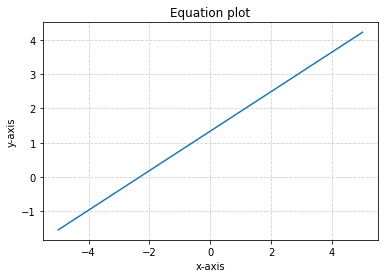

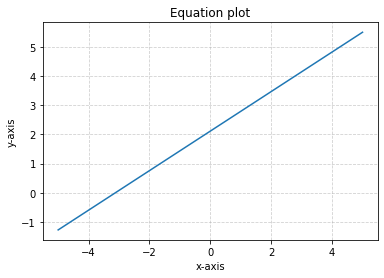

In the both the scenarios the mapping between input and output is entirely linear.


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import random

def input_function_1(x):
    phi_0 = random.random(); phi_1 = random.random()
    phi_2 = random.random(); phi_3 = random.random()
    omega_0 = random.random(); omega_1 = random.random()
    theta_10 = random.random(); theta_11 = random.random()
    theta_20 = random.random(); theta_21 = random.random()
    theta_30 = random.random(); theta_31 = random.random()
    
    h_1 = omega_0 + omega_1 * (theta_10 + theta_11 * x)
    h_2 = omega_0 + omega_1 * (theta_20 + theta_21 * x)
    h_3 = omega_0 + omega_1 * (theta_30 + theta_31 * x)
    
    return phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3

def input_function_2(x):
    phi_0 = random.random(); phi_1 = random.random()
    phi_2 = random.random(); phi_3 = random.random()
    omega_0 = random.random(); omega_1 = random.random()
    theta_10 = random.random(); theta_11 = random.random()
    theta_20 = random.random(); theta_21 = random.random()
    theta_30 = random.random(); theta_31 = random.random()
    
    h_1 = theta_10 + theta_11 * x
    h_2 = theta_20 + theta_21 * x
    h_3 = theta_30 + theta_31 * x
    
    return phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3

def plot_function(x,y):
    fig = plt.figure(figsize = (6, 4))
    plt.plot(x, y)  # Create the plot
    plt.title('Equation plot')  # Add a title
    plt.xlabel('x-axis')  # Add X and y Label
    plt.ylabel('y-axis')
    plt.grid(alpha =.6, linestyle ='--')  # Add a grid
    plt.show()  # Show the plot

# Creating vectors X and Y
x = np.linspace(-5, 5, 50)

y = input_function_1(x)
plot_function(x,y)

y = input_function_2(x)
plot_function(x,y)

print("In the both the scenarios the mapping between input and output is entirely linear.")

**Problem 3.2** For each of the four linear regions in figure 3.3j, indicate which hidden units are inactive and which are active (i.e., which do and do not clip their inputs).

<figure>
    <img src="assets/fig_3_3_d_e_f.png" width="600" >
    <figcaption>Figure 3.3 d-f</figcaption>
</figure>

<figure>
    <img src="assets/fig_3_3_j.png" width="300" >
    <figcaption>Figure 3.3 j</figcaption>
</figure>

---

Linear region 1: From figure 3.3 d-f it is observed that from the three activations, only $h_3$ is active and, $h_1$ and $h_2$ are inactive.

Linear region 2: Similarily, $h_1$ and $h_3$ are active and, $h_2$ is inactive.

Linear region 3: Similarily, $h_1$, $h_2$ and $h_3$ are all active.

Linear region 4: Similarily, $h_1$ and $h_2$ are active and, $h_3$ is inactive.

**Problem 3.8** Consider replacing the ReLU activation function with (i) the Heaviside step function heaviside[z], (ii) the hyperbolic tangent function tanh[z], and (iii) the rectangular function rect[z]. 

Redraw a version of figure 3.3 for each of these functions. The original parameters were: $\phi = \{ \phi_0 , \phi_1 , \phi_2 , \phi_3 , \theta_{10} , \theta_{11} , \theta_{20} , \theta_{21} , \theta_{30} , \theta_{31} \} = \{−0.23, −1.3, 1.3, 0.66, −0.2, 0.4, −0.9, 0.9, 1.1, −0.7 \}$. Provide an informal description of the family of functions that can be created by neural networks with one input, three hidden units, and one output for each activation function.

----- With heaviside activation function -----


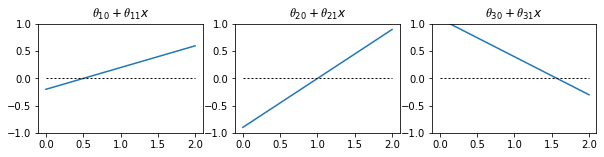

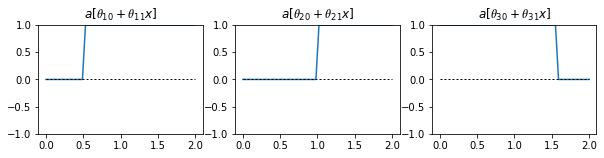

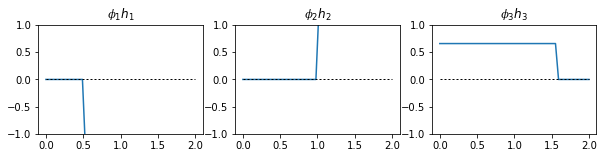

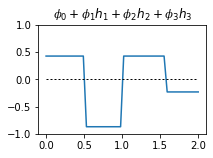

----- With tanh activation function -----


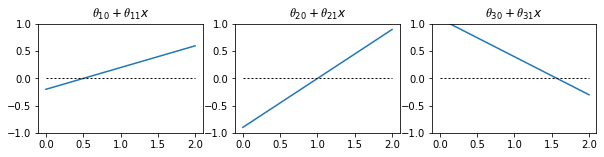

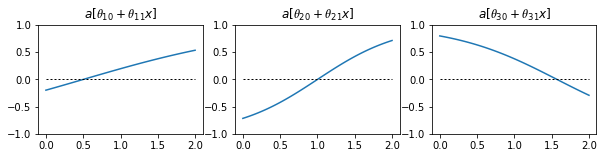

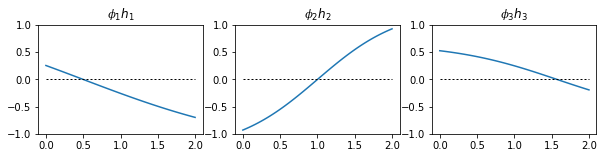

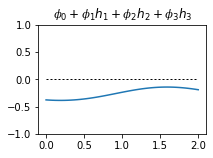

----- With rect activation function -----


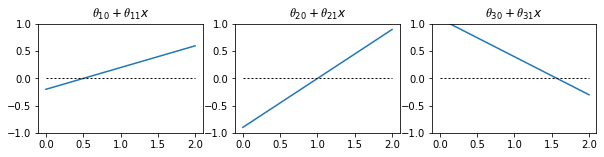

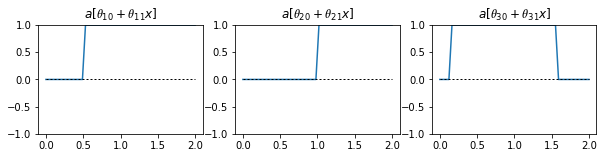

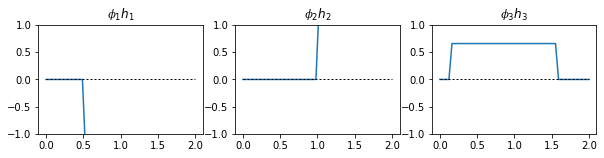

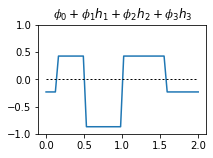

----- With relu activation function -----


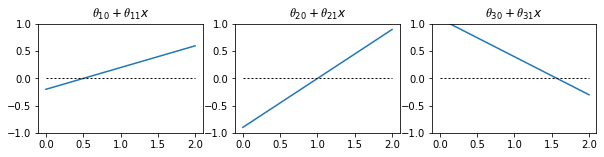

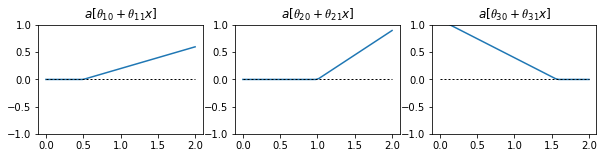

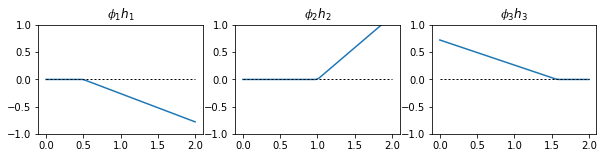

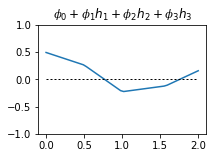

In [10]:
def equation_line(x, theta_1, theta_2):
    return theta_1 + theta_2 * x

def rect_activation(z):
    return np.array([1 if val >= 0 and val <= 1 else 0 for val in z])

def apply_activation(input_value, activation):
    if activation == 'heaviside':
        return np.heaviside(input_value,1)
    elif activation == 'tanh':
        return np.tanh(input_value)
    elif activation == 'relu':
        return np.maximum(0,input_value)
    elif activation == 'rect':
        return rect_activation(input_value)

def equation_plot(activation):
    print("----- With", activation, "activation function -----")
    phi_0 = -0.23; phi_1 = -1.3
    phi_2 = 1.3; phi_3 = 0.66
    theta_10 = -0.2; theta_11 = 0.4
    theta_20 = -0.9; theta_21 = 0.9
    theta_30 = 1.1; theta_31 = -0.7
    
    # Creating vectors X and Y
    x = np.linspace(0, 2, 50)
    
    l_1 = equation_line(x, theta_10, theta_11)
    l_2 = equation_line(x, theta_20, theta_21)
    l_3 = equation_line(x, theta_30, theta_31)

    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = l_1; ax[0].plot(x, y); ax[0].set_title("$𝜃_{10} + 𝜃_{11}x$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = l_2; ax[1].plot(x, y); ax[1].set_title("$𝜃_{20} + 𝜃_{21}x$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = l_3; ax[2].plot(x, y); ax[2].set_title("$𝜃_{30} + 𝜃_{31}x$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    # Apply activation
    h_1 = apply_activation(l_1, activation)
    h_2 = apply_activation(l_2, activation)
    h_3 = apply_activation(l_3, activation)
    
    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = h_1; ax[0].plot(x, y); ax[0].set_title("$a[𝜃_{10} + 𝜃_{11}x]$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = h_2; ax[1].plot(x, y); ax[1].set_title("$a[𝜃_{20} + 𝜃_{21}x]$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = h_3; ax[2].plot(x, y); ax[2].set_title("$a[𝜃_{30} + 𝜃_{31}x]$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    fig, ax = plt.subplots(1, 3, figsize = (10, 2))# plot at row 0, column 0
    y = phi_1*h_1; ax[0].plot(x, y); ax[0].set_title("$𝜙_1h_1$"); ax[0].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[0].set_ylim([-1, 1])
    y = phi_2*h_2; ax[1].plot(x, y); ax[1].set_title("$𝜙_2h_2$"); ax[1].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[1].set_ylim([-1, 1])
    y = phi_3*h_3; ax[2].plot(x, y); ax[2].set_title("$𝜙_3h_3$"); ax[2].plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); ax[2].set_ylim([-1, 1])
    plt.show()
    
    y = phi_0 + phi_1*h_1 + phi_2*h_2 + phi_3*h_3; 
    plt.figure(figsize = (3, 2))
    plt.plot(x, y); plt.title("$𝜙_0+𝜙_1h_1+𝜙_2h_2+𝜙_3h_3$"); plt.plot(x, [0] * len(y), 'k-', lw=1,dashes=[2, 2]); plt.ylim([-1, 1])
    plt.show()
    
equation_plot('heaviside')
equation_plot('tanh')
equation_plot('rect')
equation_plot('relu')